In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms

data_dir = '/content/drive/MyDrive/programs/data'  # Replace with the actual path to your data directory

# Define the transformations for the data
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Load the datasets with ImageFolder
image_datasets = {
    x: datasets.ImageFolder(
        root=data_dir + '/' + x,
        transform=data_transforms[x]
    )
    for x in ['train', 'test']
}

# Create the data loaders
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x],
        batch_size=32,
        shuffle=True,
        num_workers=4
    )
    for x in ['train', 'test']
}

# define DenseNet-121 architecture
model = models.densenet121(pretrained=True)
num_features = model.classifier.in_features
model.classifier = nn.Linear(num_features, 2)  # Assuming 2 classes (benign and malignant)
# defining loss function and optimizer:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

import matplotlib.pyplot as plt

# Define DenseNet-121 architecture
model = models.densenet121(pretrained=True)
num_features = model.classifier.in_features
model.classifier = nn.Linear(num_features, 2)  # Assuming 2 classes (benign and malignant)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can 

Epoch 1/12
----------
Training Loss: 0.1902   Test Accuracy: 0.9060
Epoch 2/12
----------
Training Loss: 0.1638   Test Accuracy: 0.9000
Epoch 3/12
----------
Training Loss: 0.1555   Test Accuracy: 0.9045
Epoch 4/12
----------
Training Loss: 0.1578   Test Accuracy: 0.9015
Epoch 5/12
----------
Training Loss: 0.1373   Test Accuracy: 0.9015
Epoch 6/12
----------
Training Loss: 0.1255   Test Accuracy: 0.9119
Epoch 7/12
----------
Training Loss: 0.1083   Test Accuracy: 0.9149
Epoch 8/12
----------
Training Loss: 0.1252   Test Accuracy: 0.9104
Epoch 9/12
----------
Training Loss: 0.1119   Test Accuracy: 0.9000
Epoch 10/12
----------
Training Loss: 0.1069   Test Accuracy: 0.8910
Epoch 11/12
----------
Training Loss: 0.1015   Test Accuracy: 0.9045
Epoch 12/12
----------
Training Loss: 0.1123   Test Accuracy: 0.9090


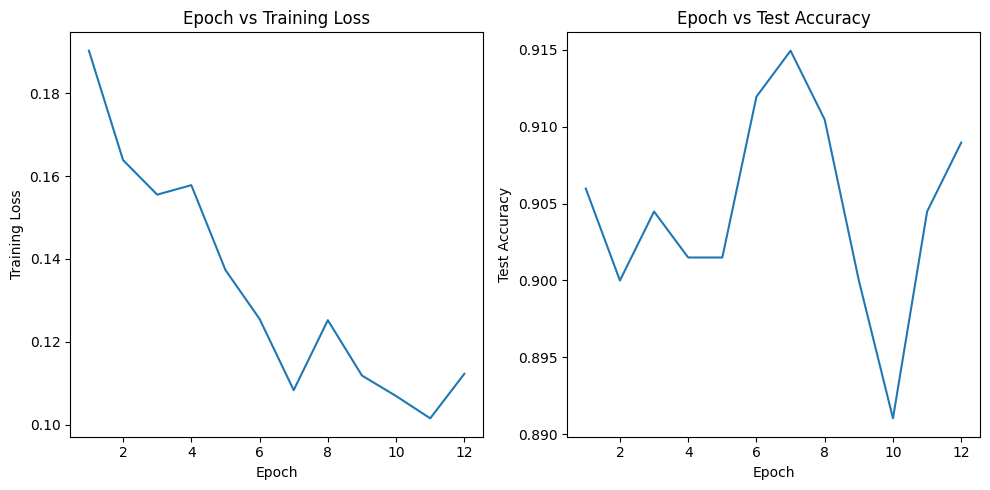

In [ ]:
# Training the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

num_epochs = 12  # Adjust as needed
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    print("-" * 10)

    # Training phase
    model.train()
    running_loss = 0.0

    for inputs, labels in dataloaders['train']:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average training loss
    train_loss = running_loss / len(dataloaders['train'])
    train_losses.append(train_loss)

    # Evaluation phase
    model.eval()
    correct_predictions = 0

    with torch.no_grad():
        for inputs, labels in dataloaders['test']:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()

    # Calculate accuracy on the test set
    accuracy = correct_predictions / len(dataloaders['test'].dataset)
    test_accuracies.append(accuracy)

    # Print the training loss and test accuracy for each epoch
    print(f"Training Loss: {train_loss:.4f}   Test Accuracy: {accuracy:.4f}")

# Plot epoch vs accuracy and epoch vs loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Epoch vs Training Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), test_accuracies)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Epoch vs Test Accuracy')

plt.tight_layout()
plt.show()